<a href="https://colab.research.google.com/github/Shubham39874/Linear_Regression/blob/main/Jamboree_Admission_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🎓 Jamboree Admission Prediction using Linear Regression

**Dataset:** [Jamboree Admission CSV](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv)

---

### 🧠 Problem Statement
Jamboree wants to understand what factors affect graduate admissions (like GRE, TOEFL, GPA, etc.) and predict the **Chance of Admit** using Linear Regression.  
This notebook covers complete EDA, model building, assumption testing, and final insights.


In [ ]:

# 📦 Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [ ]:

# 📂 Step 2: Load dataset
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'
df = pd.read_csv(url)
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:

# 🔍 Step 3: Basic Data Exploration
print("Shape of data:", df.shape)
print("\nInfo:")
df.info()

print("\nStatistical Summary:")
display(df.describe())


Shape of data: (500, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB

Statistical Summary:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:

# 🚿 Step 4: Data Cleaning
df.drop('Serial No.', axis=1, inplace=True)
print("Missing values:")
print(df.isnull().sum())


Missing values:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


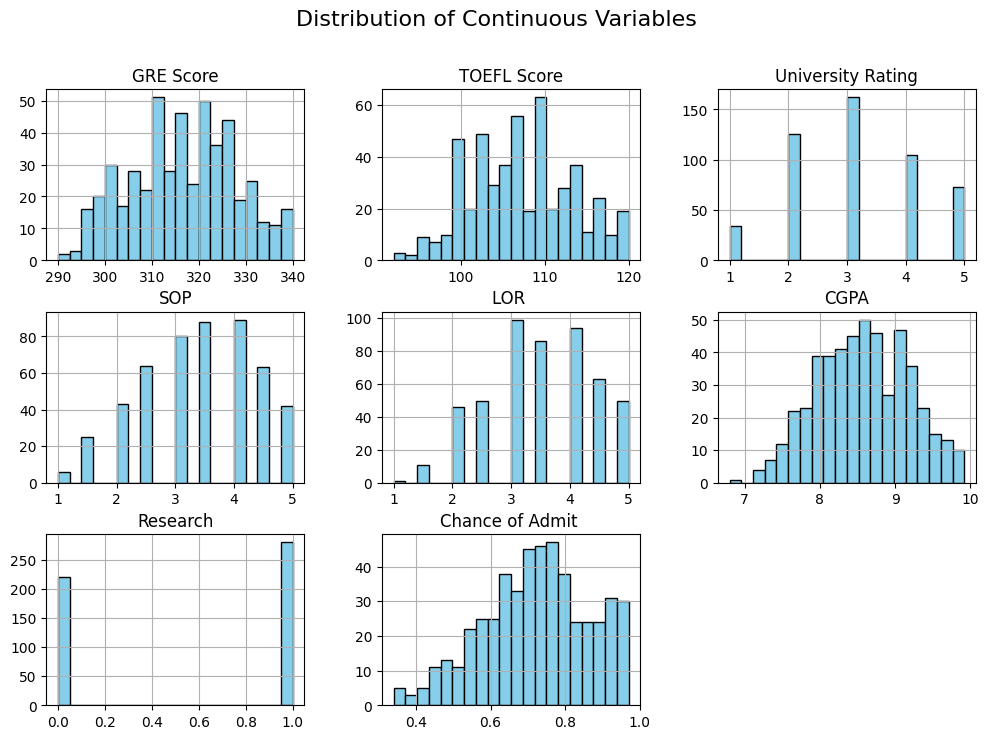

In [ ]:

# 📊 Step 5: Univariate Analysis
df.hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Continuous Variables", fontsize=16)
plt.show()


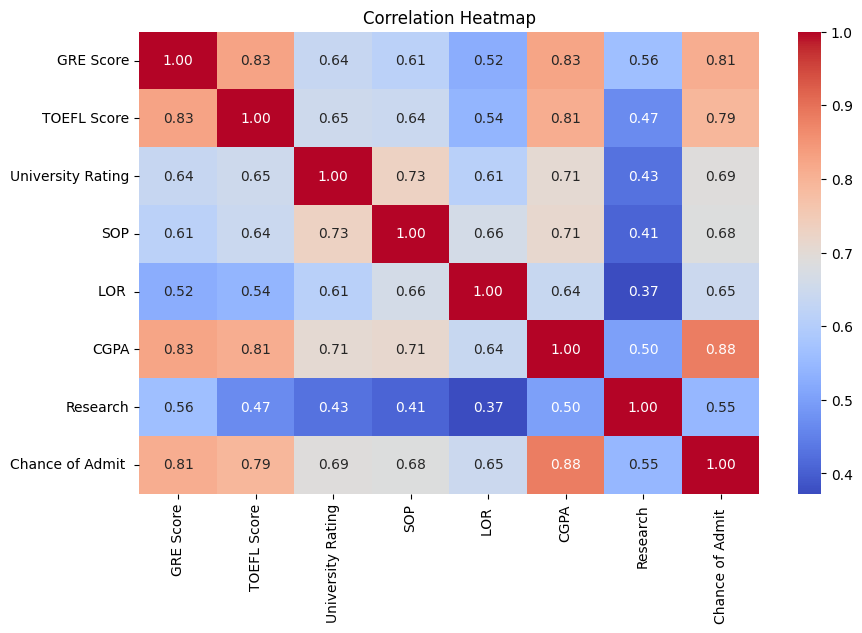

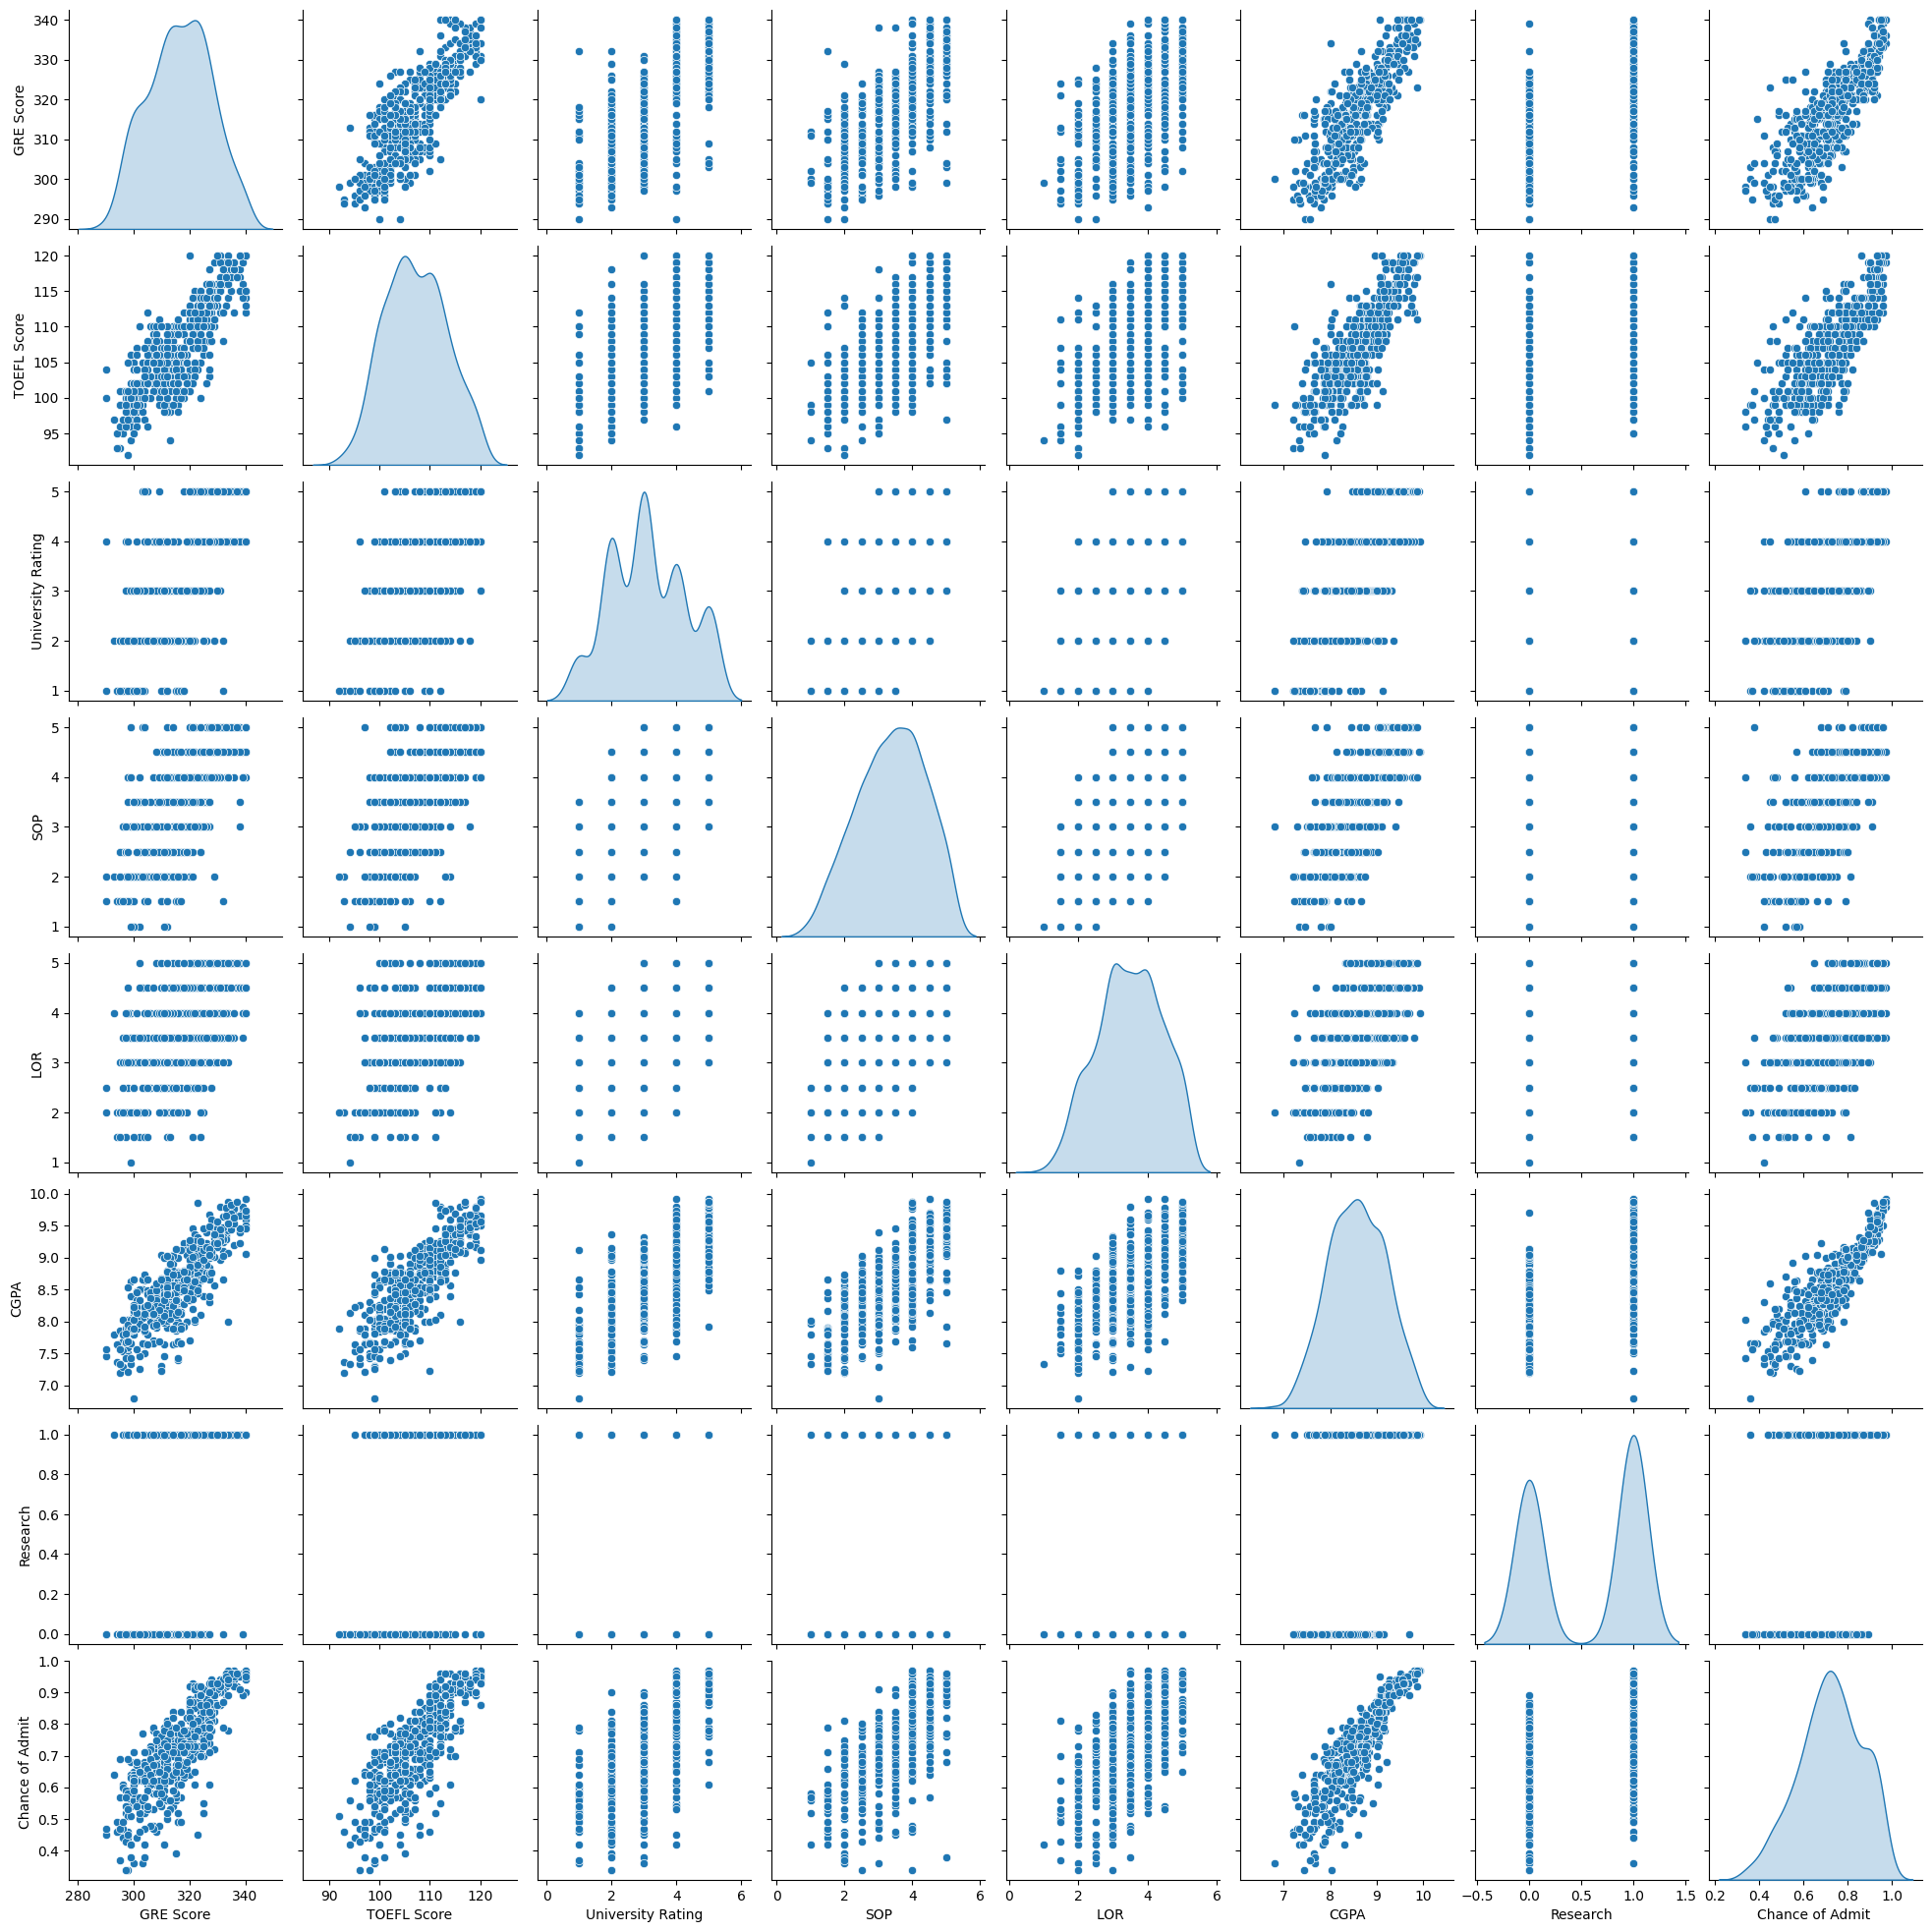

In [ ]:

# 🔗 Step 6: Bivariate Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, diag_kind='kde')
plt.show()


In [ ]:

# 🧩 Step 7: Multicollinearity Check using VIF
X = df.drop('Chance of Admit ', axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


,Feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [ ]:

# ⚙️ Step 8: Model Building (Statsmodels)
X = sm.add_constant(X)
y = df['Chance of Admit ']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          8.21e-180
Time:                        11:51:16   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

Mean of residuals: -1.794120407794253e-16


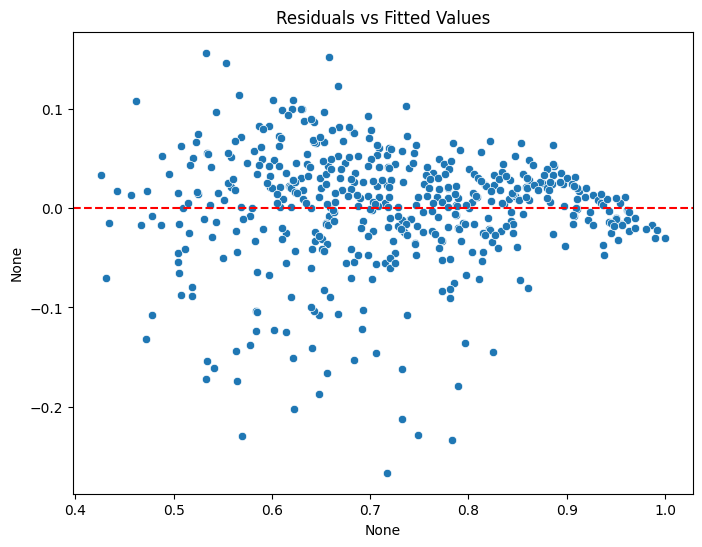

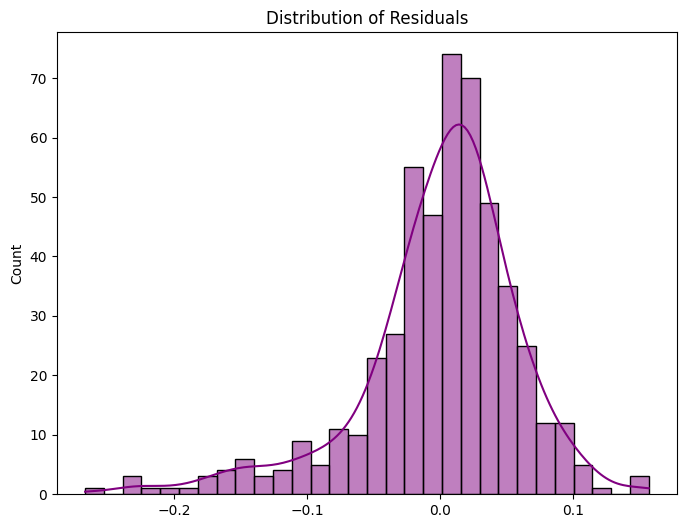

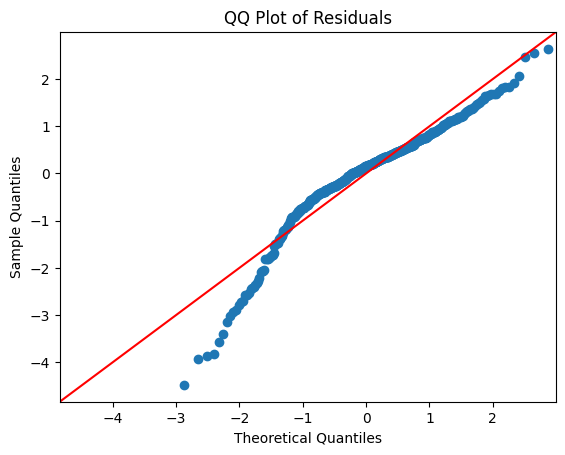

In [ ]:

# 🧾 Step 9: Residual Analysis
residuals = model.resid
print("Mean of residuals:", np.mean(residuals))

plt.figure(figsize=(8,6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Distribution of Residuals")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()


In [ ]:

# 🧮 Step 10: Model Evaluation
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")
print(f"Adjusted R2: {adj_r2:.4f}")


MAE: 0.0427
RMSE: 0.0609
R2: 0.8188
Adjusted R2: 0.8051


In [ ]:

# 🧱 Step 11: Try Ridge and Lasso Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))


Ridge R2: 0.8179793486575073
Lasso R2: 0.727120322849387



## 💡 Insights & Recommendations

- GRE, TOEFL, and GPA have the strongest positive correlation with the Chance of Admit.
- Research experience and strong SOP/LOR ratings improve chances slightly.
- Residuals are normally distributed and have zero mean → assumptions mostly satisfied.
- Adjusted R² is high → model explains most variation in the outcome.
- Adding more data (e.g., extracurriculars, essay quality, internships) can improve predictions.
- Ridge and Lasso can reduce overfitting.
